# Twitter Sentiments Analysis

<img src="Images/image.JPG" style="width:50%; height:auto;">

# Summary
This project aims to analyze the sentiment of tweets related to Apple and Google products using Natural Language Processing (NLP) techniques. The dataset used contains over 9,000 tweets rated by human raters as either positive, negative, or neutral. The goal is to build a model capable of determining the sentiment of a tweet based on its content, which can be used for analyzing public perception of these tech companies.

#### The project involved the following steps:
* Data Preparation:
 Cleaned the data, removed irrelevant content, and vectorized the text using TF-IDF.
* Model Building:
  A baseline Logistic Regression model and a DecisionTreeClassifier were first built for binary classification (positive vs. negative). We then extended them to multiclass classification to include neutral tweets.
* Advanced Models:
  We applied XGBoost on both binary and multiclass classification.
* Model Evaluation:
 The models were evaluated and compared using metrics such as accuracy.
 The best-performing model was the XGBoost for binary classification and DecisionTreeClassifier for the multiclass   classification, which showed high accuracy and balanced precision and recall across all classes. These models provide practical solutions for real-time analysis of tweet sentiments related to Apple and Google products.

* In conclusion, this project highlights the effectiveness of different machine learning models in sentiment analysis tasks, with XGBoost for binary classification and DecisionTreeClassifier for the multiclass classification proving to be the most suitable for our dataset.

## Business Understanding
#### 1. Objective:
The goal is to build an NLP model that rates the sentiment of a Tweet as positive, negative, or neutral, based on its content. This is useful for companies to understand customer opinions, make decisions, and improve products.

#### 2. Target Audience:
The sentiment analysis could help marketers, product managers, and customer service teams understand how users feel about products.

#### 3. Success Criteria:
Success is measured by the accuracy and other classification metrics (Precision, Recall and F1-score) of the model. An acceptable model should classify sentiments effectively

## Data Understanding
* The dataset, sourced from `CrowdFlower` via [data.world](https://data.world/crowdflower/brands-and-product-emotions), contains over 9,000 tweets rated by human annotators as positive, negative, or neutral.
* The dataset comprises tweets collected from Twitter, containing:
1. Tweet Text: The content of the tweets where users express their opinions.
2. Emotion Directed At: The specific product or brand the sentiment is directed towards (e.g., Apple, Google).
3. Type of Emotion: The sentiment type classified into categories such as positive, negative, and neutral

## Loading the Dataset

In [1]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
df = pd.read_csv("Data/judge-1377884607_tweet_product_company.csv", encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Data Preprocessing

#### Check for Null Values

In [3]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [4]:
# Remove rows where 'tweet_text' is missing
data = df.dropna(subset=['tweet_text'])

# Fill missing values in 'emotion_in_tweet_is_directed_at' with 'Unknown'
data.loc[:, 'emotion_in_tweet_is_directed_at'] = data['emotion_in_tweet_is_directed_at'].fillna('Unknown')

# Check if null values remain
data.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [5]:
# Check the dataset looking out for any inconsistencies
data.head().style.set_properties(**{'text-align': 'left'})

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,Positive emotion


#### Text Preprocessing

In [6]:
import re
nltk.download('wordnet')
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    # Check if the input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ''
    
    # Remove non-ASCII characters (this will remove the encoding issues)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove mentions (e.g., @mention)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)
    
    # Remove URLs (e.g., {link})
    text = re.sub(r'http\S+|www\S+|https\S+|{link}', '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuations (keeping only words)
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Tokenize text using RegexpTokenizer (keeping tokens with 2 or more characters)
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    

    return (tokens)

# Apply the updated preprocessing function
data['cleaned_tweet_text'] = data['tweet_text'].apply(preprocess_text)

print(data[['tweet_text', 'cleaned_tweet_text']])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                     cleaned_tweet_text  
0     [iphone, hr, tweeting, dead, need, upgrade, pl...  
1     [know, awesome, ipad, iphone, app, likely, app...  
2                                    [wait, also, sale]  
3     [hope, year, festival, crashy, year, iphone, app]  
4

C:\Users\User\AppData\Local\Temp\ipykernel_436\1293696798.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_tweet_text'] = data['tweet_text'].apply(preprocess_text)


#### EDA

#### A plot showing the top 30 frequent words

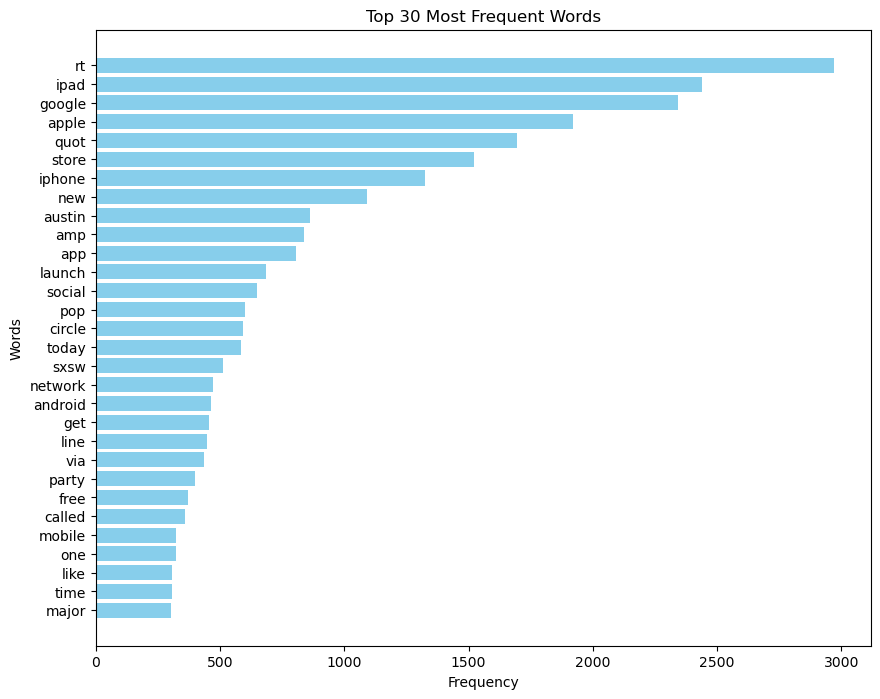

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Split each cleaned tweet into words and combine them into a single list
all_words = list(itertools.chain.from_iterable(data['cleaned_tweet_text']))
# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 30 most common words
most_common_words = word_counts.most_common(30)

# Plot the 30 most common words using a bar chart
words, counts = zip(*most_common_words)  # Unpack the word-count pairs

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')  # Horizontal bar chart
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()

* The graph above illustrates the most commonly used words in the analyzed tweets. The word "rt," which stands for "retweet," appears with the highest frequency, indicating that many tweets are shared content from other users.
* Following "rt," the words "ipad" and "google" are among the most frequent, suggesting that a significant portion of the tweets focus on discussions about the iPad and Google products.
* This provides insight into the primary topics and entities that are being mentioned in the tweets related to Apple and Google products.

#### Distribution of Sentiments in Tweets
* Let's count the number of occurrences for each sentiment and plot a pie chart showing the Distribution of Sentiments in Tweets

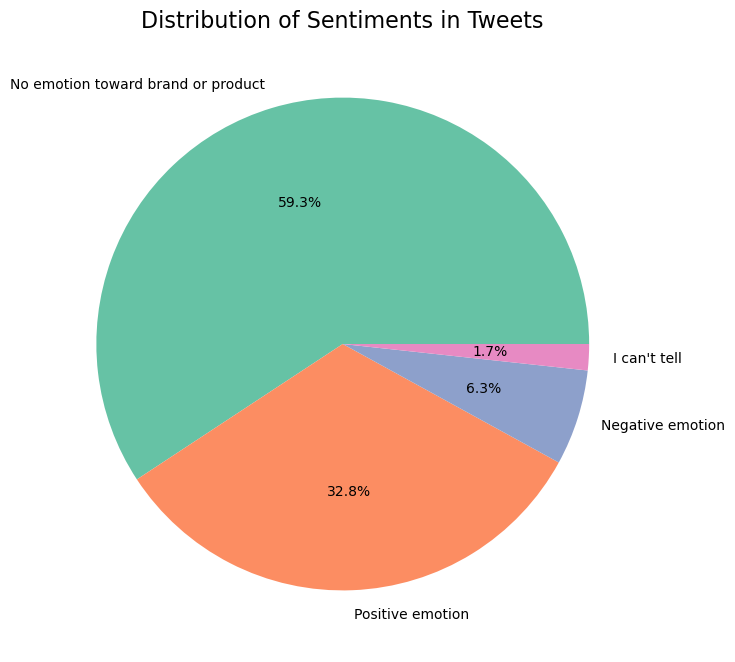

In [8]:
import seaborn as sns


# Count the number of occurrences for each sentiment
sentiment_counts = data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Plot the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Customize the plot
plt.title('Distribution of Sentiments in Tweets', fontsize=16)

# Show the plot
plt.show()

* No emotion toward brand or product (59.3%): The majority of tweets (59.3%) do not express any particular sentiment toward the brand or product, indicating that these tweets are neutral in nature or simply informational without an emotional tone.

* Positive emotion (32.8%): A significant portion of the tweets (32.8%) expresses positive sentiment, showing that nearly a third of the users have a favorable attitude towards the brands or products mentioned.

* Negative emotion (6.3%): A smaller percentage of tweets (6.3%) conveys negative emotions, meaning only a small fraction of users expressed dissatisfaction or negative opinions.

* I can't tell (1.7%): A very small portion (1.7%) of the tweets could not be clearly categorized in terms of sentiment, which suggests that these tweets are either ambiguous or lack sufficient information to determine the sentiment.

#### A Stacked Distribution of Sentiments per Entity

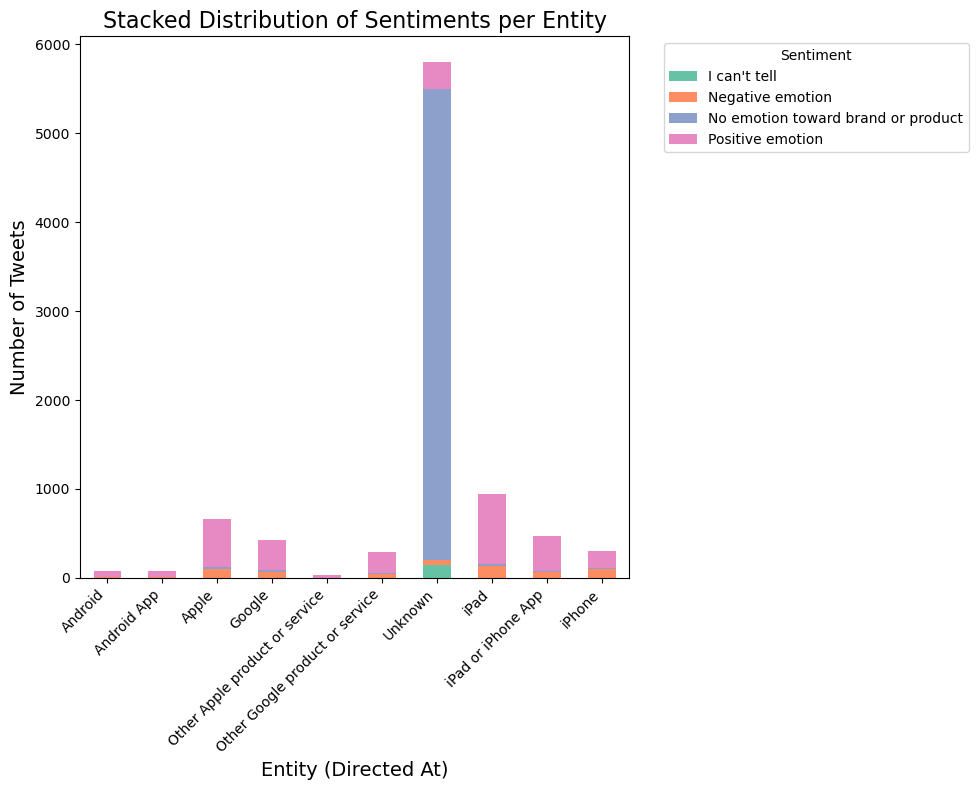

In [9]:
sentiment_per_entity = data.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).size().reset_index(name='count')
pivot_data = sentiment_per_entity.pivot(index='emotion_in_tweet_is_directed_at', columns='is_there_an_emotion_directed_at_a_brand_or_product', values='count')

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 8), color=sns.color_palette("Set2"))

# Customize the plot
plt.title('Stacked Distribution of Sentiments per Entity', fontsize=16)
plt.xlabel('Entity (Directed At)', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

* Unknown: The majority of tweets are directed at an unspecified or unknown entity, which shows a dominant neutral sentiment (blue), with a small portion of positive and unclear sentiment.

* iPad: Among the specific entities, iPad has a noticeable proportion of tweets, with a significant portion showing positive sentiment (pink) and some neutral tweets.

* Apple, Google, iPhone: Entities like Apple, Google, and iPhone also show similar distributions with a considerable number of positive sentiment tweets, followed by neutral sentiment. Negative sentiment is relatively low across these entities.

* Other Products and Apps: Other products or services like "Android," "Other Apple product or service," and "Other Google product or service" have relatively fewer tweets compared to the core entities, but still show a mix of positive, neutral, and negative sentiments.

#### Word Cloud Sentiment Distribution

In [10]:
data['sentiment'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    "Positive emotion": 1,
    "Negative emotion": -1,
    "No emotion toward brand or product": 0,
    "I can't tell": 0
})
data['sentiment'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_436\1035234349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map({


sentiment
 0    5544
 1    2978
-1     570
Name: count, dtype: int64

In [11]:
data['cleaned_tweet_text'] = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in data['cleaned_tweet_text']]
positive_text = " ".join(tweet for tweet in data[data['sentiment'] == 1.0]['cleaned_tweet_text'])
negative_text = " ".join(tweet for tweet in data[data['sentiment'] == -1.0]['cleaned_tweet_text'])
neutral_text = " ".join(tweet for tweet in data[data['sentiment'] == 0.0]['cleaned_tweet_text'])

C:\Users\User\AppData\Local\Temp\ipykernel_436\3600581329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_tweet_text'] = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in data['cleaned_tweet_text']]


In [12]:
# Positive Sentiment WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Negative Sentiment WordCloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Neutral Sentiment WordCloud
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

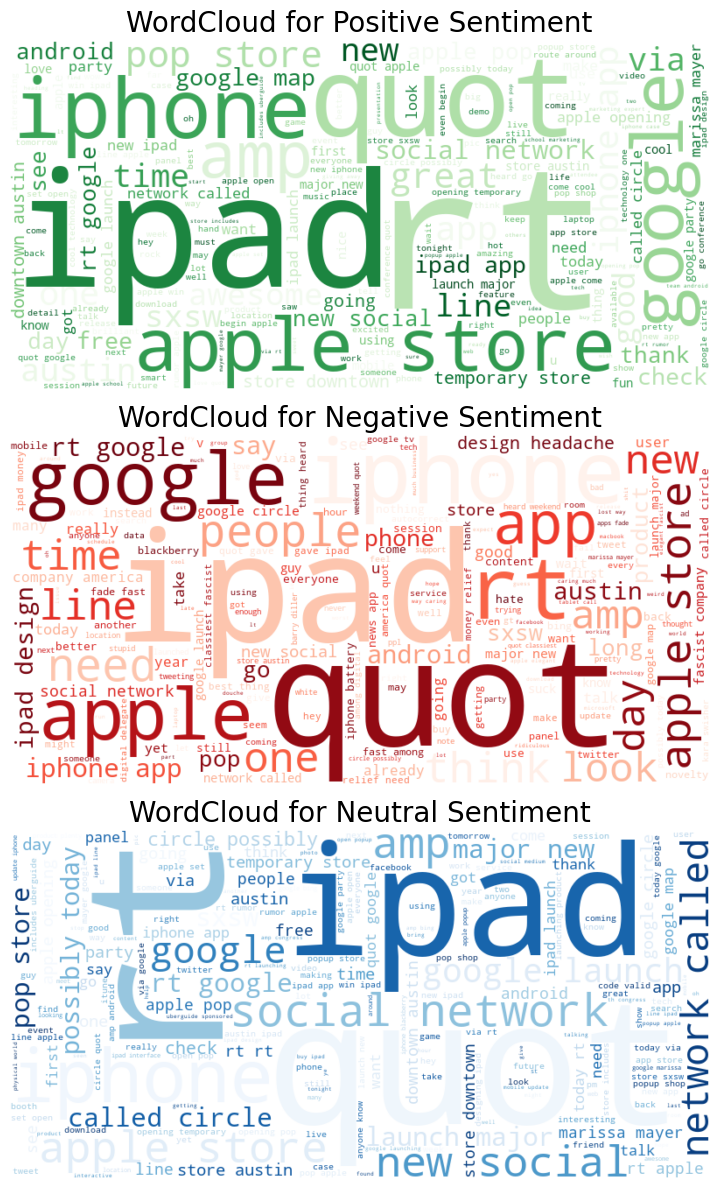

In [13]:

plt.figure(figsize=(16, 12))

# Plot Positive Sentiment
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiment', fontsize=20)

# Plot Negative Sentiment
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Sentiment', fontsize=20)

# Plot Neutral Sentiment
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Sentiment', fontsize=20)

plt.tight_layout()
plt.show()

* Positive Sentiment: The word cloud for positive sentiment will show the most frequently occurring words in positive tweets.
* Negative Sentiment: The word cloud for negative sentiment will highlight terms most frequently occurring in negative tweets.
* Neutral Sentiment: A word cloud here shows words that are used frequently in neutral tweets.

#### Sentiment Distribution per Brand/Product
* We will iterate over each entity and plot a pie chart of the sentiment distribution

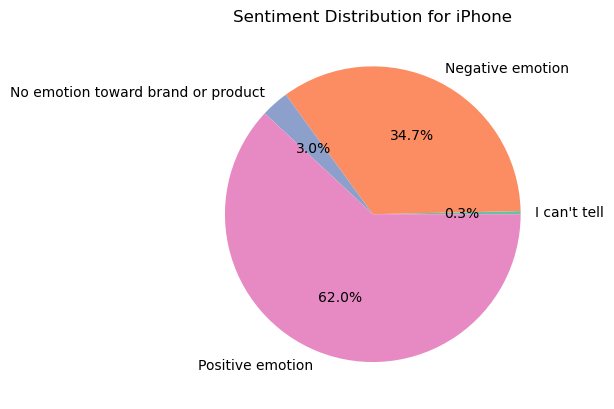

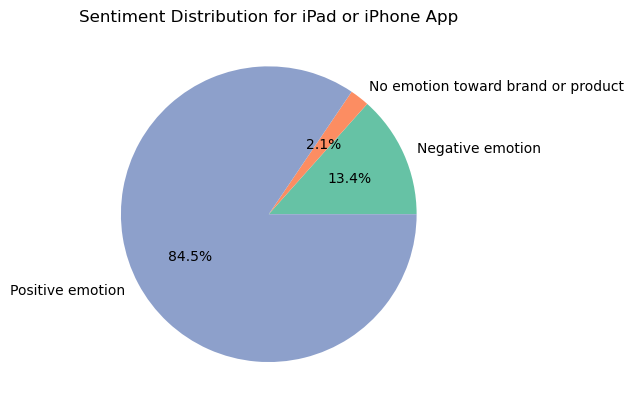

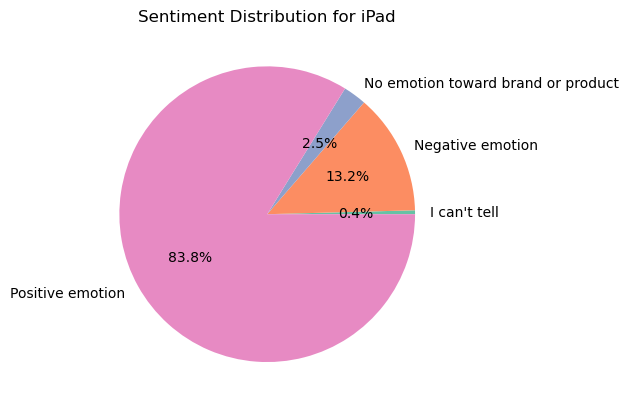

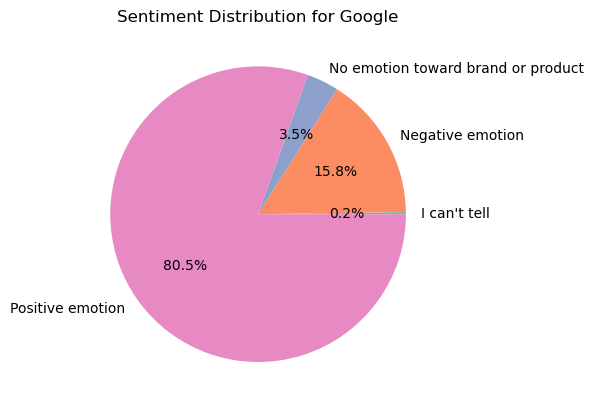

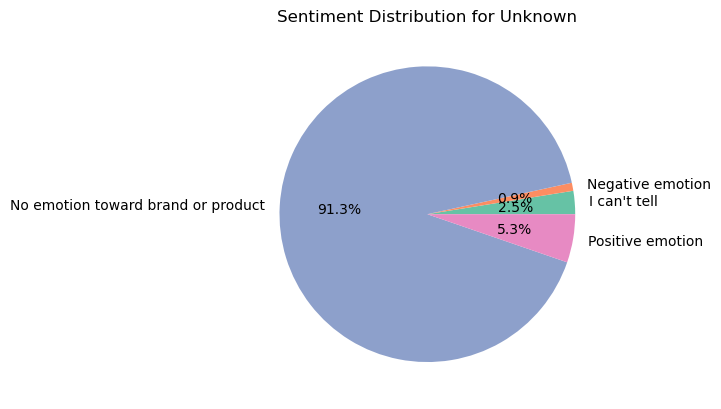

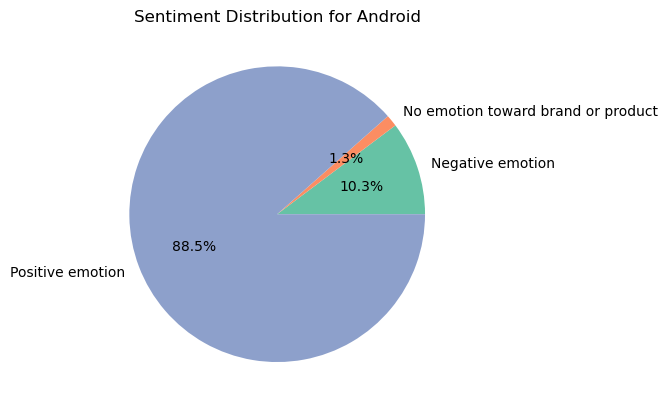

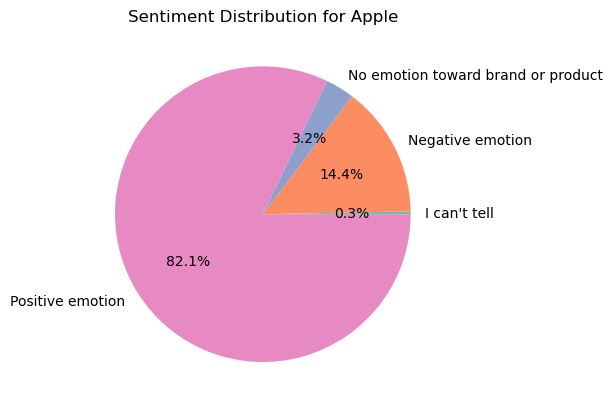

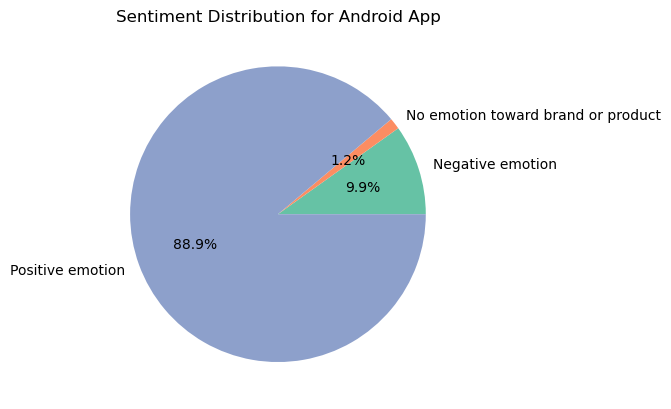

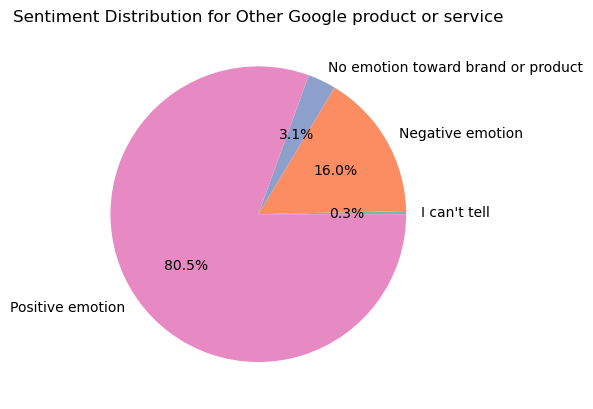

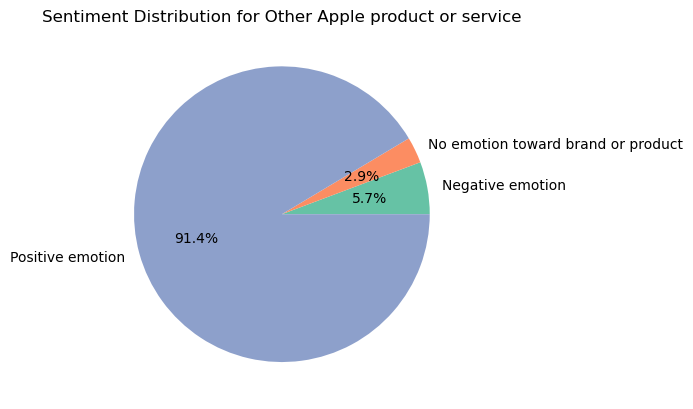

In [14]:
# Group the data by 'emotion_in_tweet_is_directed_at' and 'is_there_an_emotion_directed_at_a_brand_or_product'
# and count the number of tweets in each group
grouped = data.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).size().reset_index(name='Count')

# Get the unique entities to plot each separately
entities = data['emotion_in_tweet_is_directed_at'].unique()

# Iterate over each entity and plot a pie chart of the sentiment distribution
for entity in entities:
    # Filter the data for the current entity
    dt = grouped[grouped['emotion_in_tweet_is_directed_at'] == entity]
    plt.pie(dt['Count'], labels=dt['is_there_an_emotion_directed_at_a_brand_or_product'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Sentiment Distribution for {entity}')
    plt.show()

In [15]:
#reduce the options for s_there_an_emotion_directed_at_a_brand_or_product
data.loc[:, 'is_there_an_emotion_directed_at_a_brand_or_product'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].replace(["No emotion toward brand or product","I can't tell"], 'Neutral')
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64

In [16]:
data_cleaned = data[data['emotion_in_tweet_is_directed_at'] != 'Unknown']

In [17]:
data_cleaned.head().style.set_properties(**{'text-align': 'left'})

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet_text,sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,iphone hr tweeting dead need upgrade plugin station,-1
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate design also giving free t,1
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,wait also sale,1
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion,hope year festival crashy year iphone app,-1
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,Positive emotion,great stuff fri marissa mayer google tim reilly tech book conference amp matt mullenweg wordpress,1


In [18]:
data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion    2672
Negative emotion     519
Neutral              100
Name: count, dtype: int64

In [19]:
data_cleaned['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

## Modelling

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix

### Binary Classification

In [21]:
# filter out rows where the value in the column 'is_there_an_emotion_directed_at_a_brand_or_product' is not 'Neutral'
binary_data = data_cleaned[data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] != 'Neutral']

#### Logistic Regression: Model 1

In [22]:

# Initialize label encoder
label_encoder = LabelEncoder()
# Fit and transform the target column
binary_data.loc[:, 'target'] = label_encoder.fit_transform(binary_data['is_there_an_emotion_directed_at_a_brand_or_product'])
# Check the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the encoded target and mapping
print(binary_data[['is_there_an_emotion_directed_at_a_brand_or_product', 'target']].head())
print("Label Mapping:", label_mapping)

  is_there_an_emotion_directed_at_a_brand_or_product  target
0                                   Negative emotion       0
1                                   Positive emotion       1
2                                   Positive emotion       1
3                                   Negative emotion       0
4                                   Positive emotion       1
Label Mapping: {'Negative emotion': 0, 'Positive emotion': 1}


C:\Users\User\AppData\Local\Temp\ipykernel_436\3616436067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data.loc[:, 'target'] = label_encoder.fit_transform(binary_data['is_there_an_emotion_directed_at_a_brand_or_product'])


In [23]:
binary_data.loc[:, 'cleaned_tweet_text'] = [' '.join(doc) if isinstance(doc, list) else doc for doc in binary_data['cleaned_tweet_text']]

X = binary_data[['cleaned_tweet_text']]#, 'emotion_in_tweet_is_directed_at']]
y = binary_data['target']


from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_tweet_text'])
X_test_tfidf = tfidf.transform(X_test['cleaned_tweet_text'])
# Initialize and train the Logistic Regression model with class_weight balanced to handle class imbalance
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8622848200312989
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.09      0.17        95
           1       0.86      1.00      0.92       544

    accuracy                           0.86       639
   macro avg       0.84      0.55      0.55       639
weighted avg       0.86      0.86      0.81       639



#### Logistic Regression: Model 2
* With class_weight='balanced', solver='liblinear'

In [25]:
model2 = LogisticRegression(class_weight='balanced', solver='liblinear')
model2.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model2.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Model2 Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Model2 Accuracy: 0.7746478873239436
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.53      0.41        95
           1       0.91      0.82      0.86       544

    accuracy                           0.77       639
   macro avg       0.62      0.67      0.64       639
weighted avg       0.82      0.77      0.79       639



#### Logistic Regression: Model 3
* Wit best_parameters from RandomizedSearchCV

In [26]:
import numpy as np
# Define the parameter grid for Randomized Search
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'solver': ['liblinear', 'saga'],  # Solver options
    'class_weight': ['balanced', None]  # Class weight options
}

# Create a Logistic Regression model
model3 = LogisticRegression()

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model3,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of iterations for random search
                                   cv=5,  # Cross-validation splitting strategy
                                   scoring='accuracy',  # Evaluation metric
                                   random_state=42,
                                   n_jobs=-1,  # Use all available cores
                                   verbose=1)  # Verbosity level

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train_tfidf, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the model
print("Best Hyperparameters:", random_search.best_params_)
print("Logistic Regression Model3 Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'solver': 'saga', 'max_iter': 200, 'class_weight': None, 'C': 11.288378916846883}
Logistic Regression Model3 Accuracy: 0.8544600938967136
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.36      0.42        95
           1       0.89      0.94      0.92       544

    accuracy                           0.85       639
   macro avg       0.70      0.65      0.67       639
weighted avg       0.84      0.85      0.84       639



#### XGBoostClassifier: Model 1

In [27]:
label_encoder = LabelEncoder()

# Encode the target column
binary_data.loc[:, 'target'] = label_encoder.fit_transform(binary_data['is_there_an_emotion_directed_at_a_brand_or_product'])

# Process the cleaned tweet text
binary_data.loc[:, 'cleaned_tweet_text'] = [' '.join(doc) if isinstance(doc, list) else doc for doc in binary_data['cleaned_tweet_text']]

# Define features and target
X = binary_data[['cleaned_tweet_text']]
y = binary_data['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the cleaned tweet text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_tweet_text'])
X_test_tfidf = tfidf.transform(X_test['cleaned_tweet_text'])

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    max_depth=6,        # You can adjust this
    n_estimators=200,   # Number of trees
    learning_rate=0.1   # Learning rate
)

# Fit the model to the training data
xgb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_tfidf)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.8575899843505478
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.14      0.22        95
           1       0.87      0.98      0.92       544

    accuracy                           0.86       639
   macro avg       0.73      0.56      0.57       639
weighted avg       0.83      0.86      0.82       639



#### RandomizedSearchCV For XGBoost Model

In [28]:
# Define the parameter distribution for tuning
param_dist = {
    'max_depth': [3, 5, 7, 9],               # Different max depths
    'n_estimators': [50, 100, 200, 300],     # Different numbers of trees
    'learning_rate': [0.001, 0.01, 0.1, 0.3],  # Different learning rates
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)

# Perform the random search
random_search.fit(X_train_tfidf, y_train)

# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.3}
Best Score: 0.8550209124745788


#### XGBClassifier Model: Model 2
* With best Parameters from random search

In [29]:
xgb_model2 = xgb.XGBClassifier(
    max_depth=5,        # You can adjust this
    n_estimators=50,   # Number of trees
    learning_rate=0.3   # Learning rate
)

# Fit the model to the training data
xgb_model2.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = xgb_model2.predict(X_test_tfidf)

# Evaluate the model
print("XGBoost Model2 Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Model2 Accuracy: 0.8607198748043818
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.13      0.21        95
           1       0.87      0.99      0.92       544

    accuracy                           0.86       639
   macro avg       0.77      0.56      0.57       639
weighted avg       0.84      0.86      0.82       639



#### XGBoost Model 3 with SMOTE

In [30]:
from collections import Counter
from xgboost import XGBClassifier
# Define features and target (assuming binary_data is your dataset)
X = binary_data['cleaned_tweet_text']
y = binary_data['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the cleaned tweet text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

# Train the XGBoost model
xgb_model3 = XGBClassifier(estimator=xgb_model2, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
xgb_model3.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model3.predict(X_test_tfidf)

# Evaluate the model
print("XGBoost Model3 Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Original class distribution: Counter({1: 2128, 0: 424})
Resampled class distribution: Counter({0: 2128, 1: 2128})


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [08:08:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv", "estimator", "n_iter", "param_distributions", "scoring", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model3 Accuracy: 0.8435054773082942
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.34      0.39        95
           1       0.89      0.93      0.91       544

    accuracy                           0.84       639
   macro avg       0.68      0.63      0.65       639
weighted avg       0.83      0.84      0.83       639



### Multiclass Classification

In [31]:
# Initialize label encoder
label_encoder = LabelEncoder()
# Fit and transform the target column
data_cleaned.loc[:, 'encoded_target'] = label_encoder.fit_transform(data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'])
# Check the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the encoded target and mapping
print(data_cleaned[['is_there_an_emotion_directed_at_a_brand_or_product', 'encoded_target']].tail(10))
print("Label Mapping:", label_mapping)

     is_there_an_emotion_directed_at_a_brand_or_product  encoded_target
9064                                   Positive emotion               2
9066                                            Neutral               1
9070                                   Positive emotion               2
9071                                   Positive emotion               2
9072                                   Positive emotion               2
9077                                   Positive emotion               2
9079                                   Positive emotion               2
9080                                   Negative emotion               0
9085                                   Positive emotion               2
9088                                   Positive emotion               2
Label Mapping: {'Negative emotion': 0, 'Neutral': 1, 'Positive emotion': 2}


C:\Users\User\AppData\Local\Temp\ipykernel_436\1621321028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'encoded_target'] = label_encoder.fit_transform(data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'])


In [32]:
data_cleaned.loc[:, 'cleaned_tweet_text'] = [' '.join(doc) if isinstance(doc, list) else doc for doc in data_cleaned['cleaned_tweet_text']]

X = data_cleaned[['cleaned_tweet_text']]#, 'emotion_in_tweet_is_directed_at']]
y = data_cleaned['encoded_target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_tweet_text'])
X_test_tfidf = tfidf.transform(X_test['cleaned_tweet_text'])

#### Baseline Model: Logistic Regression model

In [33]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.8376327769347496
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.21      0.33       105
           1       0.00      0.00      0.00        19
           2       0.84      0.99      0.91       535

    accuracy                           0.84       659
   macro avg       0.54      0.40      0.41       659
weighted avg       0.81      0.84      0.79       659



C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Logistic Model: Model 2
* With class_weight='balanced', solver='liblinear' to check the class imbalance

In [34]:

# Initialize and train the Logistic Regression model with class_weight balanced to handle class imbalance
model2 = LogisticRegression(class_weight='balanced', solver='liblinear')
model2.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model2.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Model 2 Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Model 2 Accuracy: 0.8209408194233687
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.30      0.39       105
           1       0.11      0.05      0.07        19
           2       0.85      0.95      0.90       535

    accuracy                           0.82       659
   macro avg       0.51      0.43      0.45       659
weighted avg       0.79      0.82      0.79       659



#### RandomForestClassifier: Model 1

In [35]:
label_encoder = LabelEncoder()
# Fit and transform the target column
#data_cleaned['encoded_target'] = label_encoder.fit_transform(data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'])
data_cleaned.loc[:, 'encoded_target'] = label_encoder.fit_transform(data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'])
data_cleaned.loc[:, 'cleaned_tweet_text'] = [' '.join(doc) if isinstance(doc, list) else doc for doc in data_cleaned['cleaned_tweet_text']]
#emotions = data_cleaned['emotion_in_tweet_is_directed_at']
X = data_cleaned[['cleaned_tweet_text']]#, 'emotion_in_tweet_is_directed_at']]
y = data_cleaned['encoded_target']


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_tweet_text'])
X_test_tfidf = tfidf.transform(X_test['cleaned_tweet_text'])

rf_model1 = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,       
    min_samples_split=5,      
    n_estimators=200  
)
rf_model1.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf_model1.predict(X_test_tfidf)

print("1st Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

1st Random Forest Accuracy: 0.8573596358118362
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.31      0.46       105
           1       1.00      0.11      0.19        19
           2       0.86      0.99      0.92       535

    accuracy                           0.86       659
   macro avg       0.89      0.47      0.52       659
weighted avg       0.86      0.86      0.83       659



#### RandomForestClassifier : Model 2
* With SMOTE 

In [36]:
label_encoder = LabelEncoder()
# Fit and transform the target column
#data_cleaned['encoded_target'] = label_encoder.fit_transform(data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'])
data_cleaned.loc[:, 'encoded_target'] = label_encoder.fit_transform(data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'])
data_cleaned.loc[:, 'cleaned_tweet_text'] = [' '.join(doc) if isinstance(doc, list) else doc for doc in data_cleaned['cleaned_tweet_text']]
#emotions = data_cleaned['emotion_in_tweet_is_directed_at']
X = data_cleaned[['cleaned_tweet_text']]#, 'emotion_in_tweet_is_directed_at']]
y = data_cleaned['encoded_target']


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the cleaned tweet text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_tweet_text'])
X_test_tfidf = tfidf.transform(X_test['cleaned_tweet_text'])

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

rf_model_smote = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,       
    min_samples_split=5,      
    n_estimators=200  
)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model_smote.predict(X_test_tfidf)

# pipeline.fit(X_train, y_train)

# # Make predictions
# y_pred = pipeline.predict(X_test)
# Evaluate the model
print("Random Forest with Smote Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest with Smote Accuracy: 0.8482549317147192
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.36      0.48       105
           1       0.33      0.05      0.09        19
           2       0.86      0.97      0.91       535

    accuracy                           0.85       659
   macro avg       0.63      0.46      0.49       659
weighted avg       0.82      0.85      0.82       659



#### GridSearchCV for the RandomForestClassifier

In [37]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
}

# Initialize the Random Forest model
rf_model_smote = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_smote, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model to find the best parameters
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#### RandomForestClassifier Model 3:
* With the best parameters

In [38]:

rf_model_params = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,       
    min_samples_split=2,      
    n_estimators=100  
)
rf_model_params.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model_params.predict(X_test_tfidf)

# pipeline.fit(X_train, y_train)

# # Make predictions
# y_pred = pipeline.predict(X_test)
# Evaluate the model
print("Random Forest Accuracy with best parameters:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy with best parameters: 0.8406676783004552
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.35      0.46       105
           1       0.25      0.05      0.09        19
           2       0.86      0.96      0.91       535

    accuracy                           0.84       659
   macro avg       0.59      0.46      0.48       659
weighted avg       0.81      0.84      0.81       659



In [39]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report

# X_cleaned = df_cleaned['tweet_text']
# y_cleaned = df_cleaned['sentiment']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

# # Create a pipeline with TF-IDF Vectorization and Random Forest
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
#     ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
# ])
# # Split the data into training and testing sets

# pipeline = Pipeline(steps=[
#     ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
#     ('classifier', RandomForestClassifier(
#         max_depth=None,
#         min_samples_leaf=1,
#         min_samples_split=5,
#         n_estimators=200
#     ))
# ])
# Vectorize the cleaned tweet text using TF-IDF